In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [3]:
smart_watch_csv = "datasets/smartwatch_03.csv"

In [4]:
df = pd.read_csv(smart_watch_csv)
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN


In [5]:
df["Strap Material"].unique()

array(['Thermoplastic polyurethane', 'Leather', 'Plastic', 'Silicone',
       'Elastomer', 'Rubber', 'Fabric', 'Nylon', 'Stainless Steel',
       'leather', 'Aluminium', 'Leather '], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    object 
 5   Original Price                  610 non-null    object 
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 52.5+ KB


In [7]:
def to_float(x):
    return float(x.replace(",", ""))

In [8]:
df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)
df["Discount percentage"] = df["Selling Price"]/df["Original Price"]

/tmp/ipykernel_8571/4013635096.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)


In [9]:
numerical_col = [column for column in df.columns if df[column].dtype != 'object']
continous_col = [column for column in df.columns if df[column].dtype == 'object']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Discount percentage']

In [10]:
df_numerical = df[numerical_col]
df_numerical

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Discount percentage
0,2499.0,2999.0,4.1,14,0.833278
1,2099.0,2499.0,4.2,14,0.839936
2,1722.0,2099.0,3.5,14,0.820391
3,2469.0,2999.0,4.1,14,0.823274
4,1799.0,2199.0,4.3,7,0.818099
...,...,...,...,...,...
605,3499.0,9999.0,4.1,10,0.349935
606,4999.0,14999.0,4.1,10,0.333289
607,2999.0,7999.0,4.0,8,0.374922
608,5846.0,5999.0,2.4,5,0.974496


In [11]:
df_numerical.isna().sum(), df.duplicated().sum()

(Selling Price                      0
 Original Price                     0
 Rating (Out of 5)                 56
 Average Battery Life (in days)     0
 Discount percentage                0
 dtype: int64,
 np.int64(4))

In [12]:
df_numerical = df_numerical.drop_duplicates()

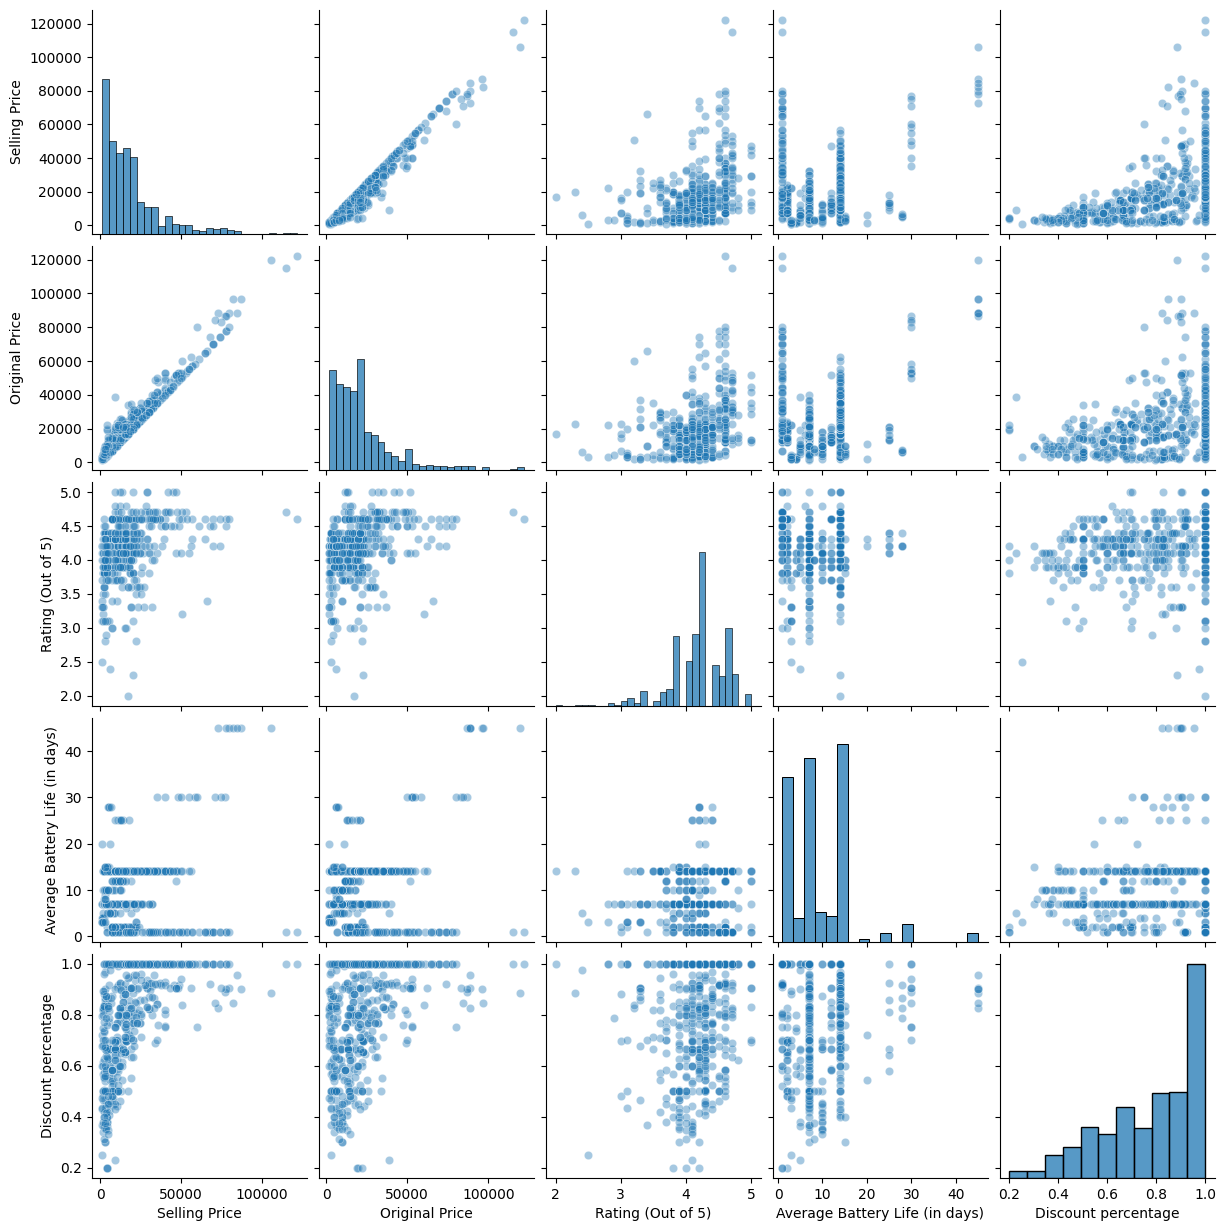

In [13]:
sns.pairplot(data=df_numerical,
             kind="scatter",
             plot_kws={"alpha": 0.4})

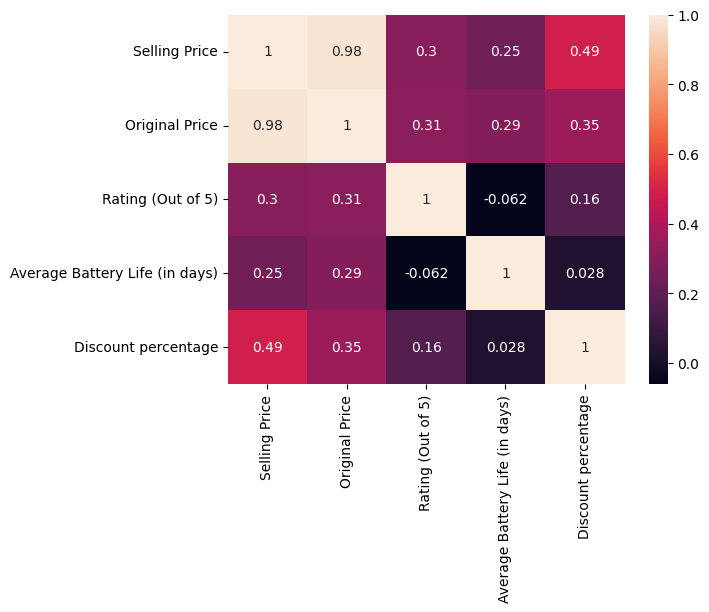

In [14]:
sns.heatmap(df_numerical.corr(), annot=True)
plt.plot(0)

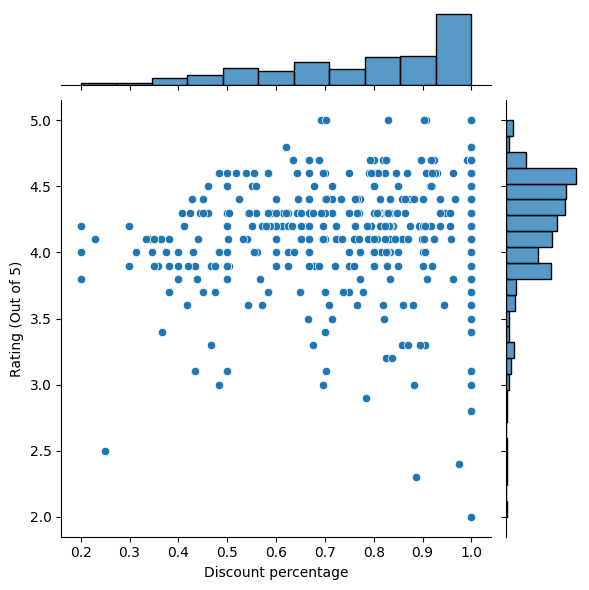

In [15]:
sns.jointplot(data=df_numerical, x=df_numerical['Discount percentage'],
              y=df["Rating (Out of 5)"])

Feature engineering

In [78]:
df = df.copy()

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
train_df = df.sample(frac=0.8, random_state=43)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [81]:
df.shape, train_df.shape, test_df.shape

((606, 12), (485, 13), (121, 13))

In [82]:
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [83]:
def hundred_to_zero(x):
    if x == 100:
        return x
    else:
        return x

In [84]:
train_df["Discount price"] = train_df['Selling Price'] - train_df['Original Price']
train_df["Average Battery Life (in days)"] = train_df["Average Battery Life (in days)"].astype(float)
train_df['Discount percentage'] = train_df['Discount percentage'] * 100
train_df['Discount percentage'] = train_df['Discount percentage'].apply(lambda x: hundred_to_zero(x))
train_df.drop("Discount percentage", axis=1, inplace=True)
train_df

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews,Discount price
0,FOSSIL,Smartwatch,Q Venture,White,4399.0,21995.0,AMOLED Display,3.8,Leather,1.0,46,-17596.0
1,APPLE,Smartwatch,Series 5 GPS 40 mm Silver Aluminium Case,White,40900.0,40900.0,OLED Retina Display,4.7,Aluminium,1.0,NaN,0.0
2,huami,Smartwatch,Amazfit GTS 2e,Purple,7999.0,13999.0,AMOLED Display,4.2,Silicone,14.0,294,-6000.0
3,FOSSIL,Smartwatch,FTW2115 Q Watch,Red,18995.0,18995.0,AMOLED Display,4.6,Stainless Steel,2.0,NaN,0.0
4,huami,Smartwatch,Amazfit Bip S Lite,Black,1999.0,4999.0,AMOLED Display,3.9,Silicone,14.0,849,-3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,APPLE,Smartwatch,series 2 - 38 mm Stainless Steel Case,Blue Modern,64900.0,64900.0,OLED Retina Display,4.6,Stainless Steel,1.0,NaN,0.0
481,FOSSIL,Smartwatch,Q Venture,Blue,19999.0,21995.0,AMOLED Display,3.8,Leather,1.0,54,-1996.0
482,APPLE,Smartwatch,Series 5 GPS + Cellular 44 mm Space Grey Alumi...,Black,52900.0,52900.0,OLED Retina Display,4.7,Aluminium,1.0,NaN,0.0
483,FitBit,FitnessBand,Charge HR,"Orange, Pink, Green",14990.0,14990.0,OLED Display,3.9,Thermoplastic polyurethane,7.0,NaN,0.0


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      485 non-null    object 
 1   Device Type                     485 non-null    object 
 2   Model Name                      485 non-null    object 
 3   Color                           485 non-null    object 
 4   Selling Price                   485 non-null    float64
 5   Original Price                  485 non-null    float64
 6   Display                         485 non-null    object 
 7   Rating (Out of 5)               439 non-null    float64
 8   Strap Material                  485 non-null    object 
 9   Average Battery Life (in days)  485 non-null    float64
 10  Reviews                         84 non-null     object 
 11  Discount price                  485 non-null    float64
dtypes: float64(5), object(7)
memory usag

In [86]:
numerical_col = [column for column in train_df.columns if train_df[column].dtype == 'float64']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Discount price']

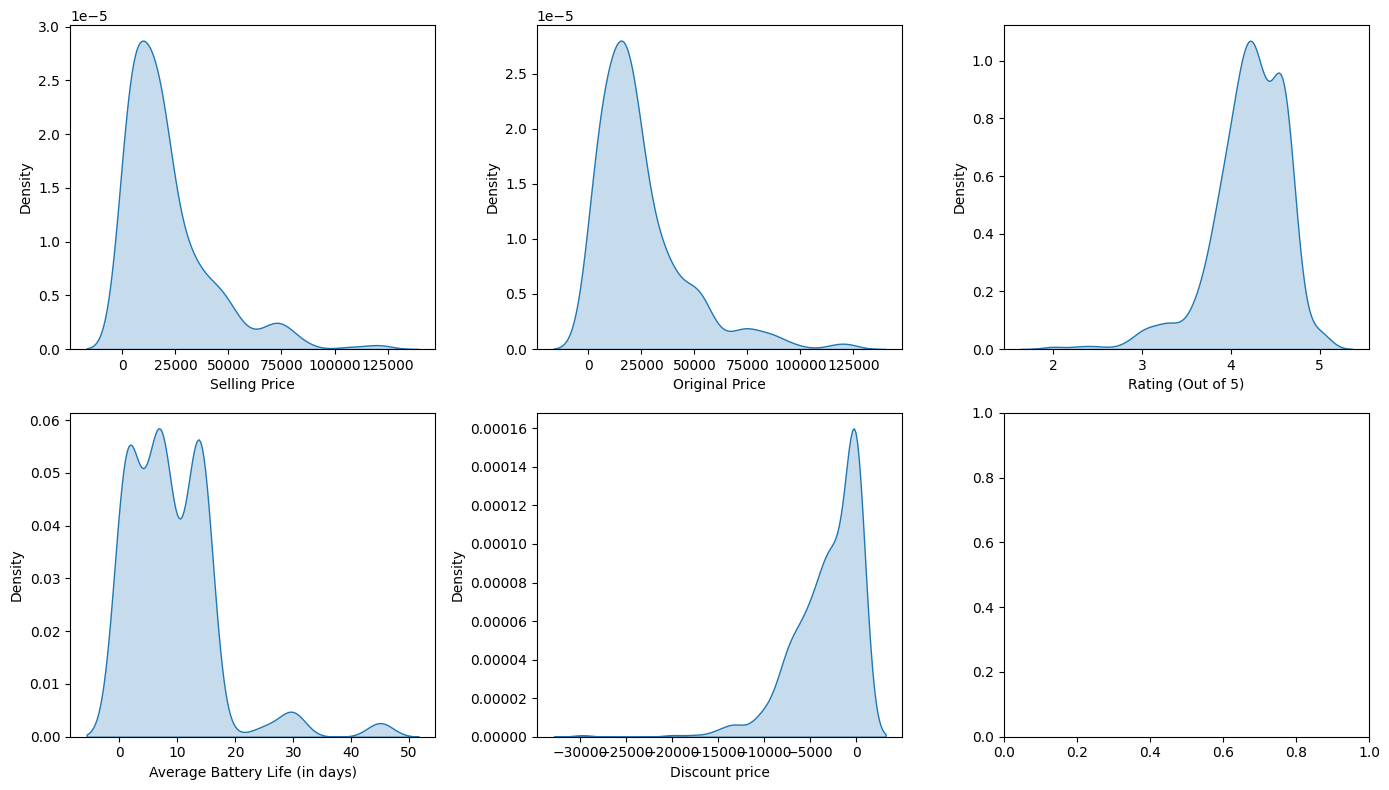

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)
    
fig.tight_layout()
plt.show()

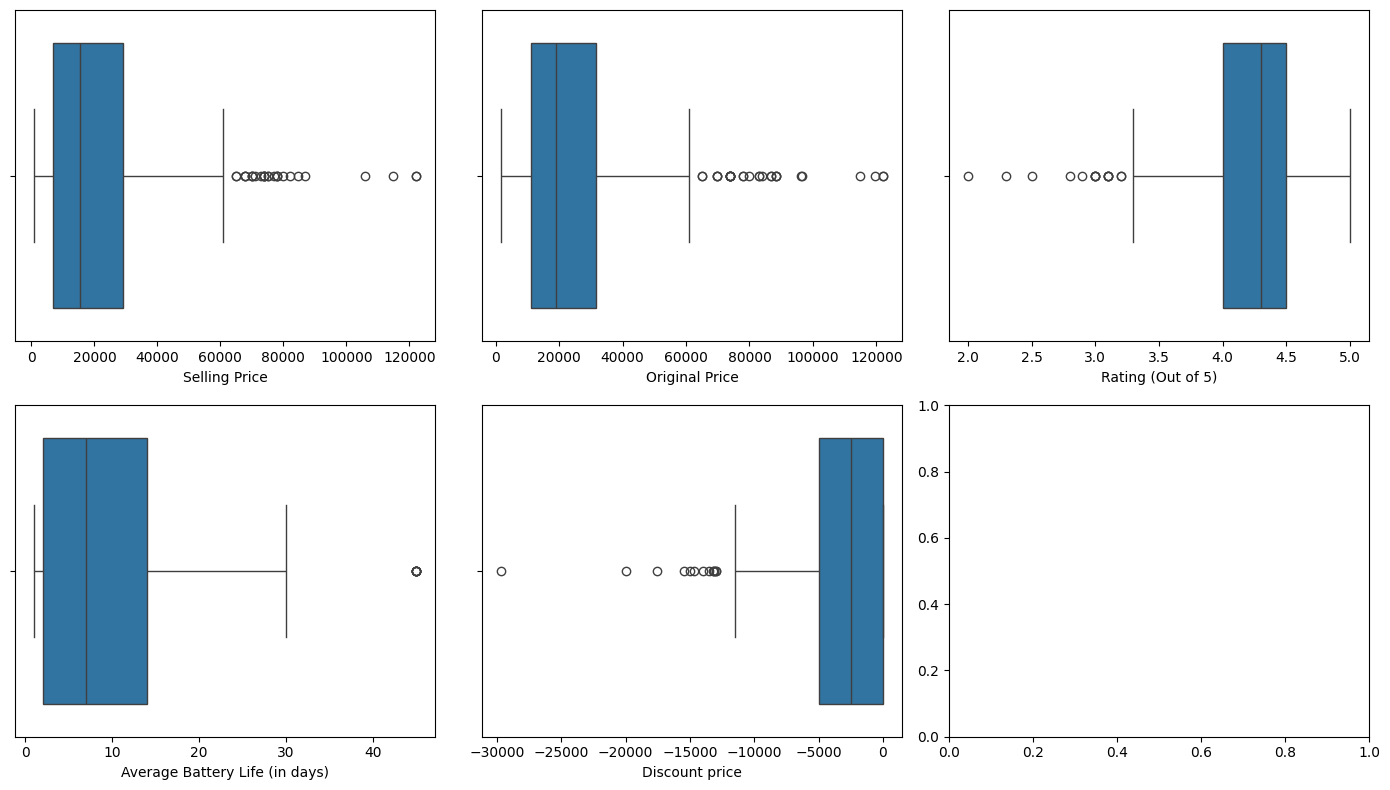

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()

In [87]:
train_df.head(5)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews,Discount price
0,FOSSIL,Smartwatch,Q Venture,White,4399.0,21995.0,AMOLED Display,3.8,Leather,1.0,46,-17596.0
1,APPLE,Smartwatch,Series 5 GPS 40 mm Silver Aluminium Case,White,40900.0,40900.0,OLED Retina Display,4.7,Aluminium,1.0,NaN,0.0
2,huami,Smartwatch,Amazfit GTS 2e,Purple,7999.0,13999.0,AMOLED Display,4.2,Silicone,14.0,294,-6000.0
3,FOSSIL,Smartwatch,FTW2115 Q Watch,Red,18995.0,18995.0,AMOLED Display,4.6,Stainless Steel,2.0,NaN,0.0
4,huami,Smartwatch,Amazfit Bip S Lite,Black,1999.0,4999.0,AMOLED Display,3.9,Silicone,14.0,849,-3000.0


In [94]:
import pandas as pd

def remove_outlier_IQR(data: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Removes outliers from a DataFrame column using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    col (str): The column name for which to remove outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    if col not in data.columns:
        print(f"Column {col} does not exist in the DataFrame.")
        return data
    
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"Column {col} is not numeric and cannot be processed.")
        return data

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"Processing column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    removed_outliers_count = len(data) - len(filtered_data)
    print(f"Removed {removed_outliers_count} outliers from column: {col}")
    
    return filtered_data

In [95]:
import_col = ['Selling Price', 'Original Price', 'Rating (Out of 5)']  # Replace with your actual columns
for col in import_col:
    print(f"Removing outliers from column: {col}")
    train_df = remove_outlier_IQR(data=train_df, col=col)

Removing outliers from column: Selling Price
Processing column: Selling Price
Q1: 5449.5, Q3: 19995.0, IQR: 14545.5
Lower bound: -16368.75, Upper bound: 41813.25
Removed 3 outliers from column: Selling Price
Removing outliers from column: Original Price
Processing column: Original Price
Q1: 8999.0, Q3: 22995.0, IQR: 13996.0
Lower bound: -11995.0, Upper bound: 43989.0
Removed 0 outliers from column: Original Price
Removing outliers from column: Rating (Out of 5)
Processing column: Rating (Out of 5)
Q1: 4.0, Q3: 4.5, IQR: 0.5
Lower bound: 3.25, Upper bound: 5.25
Removed 0 outliers from column: Rating (Out of 5)


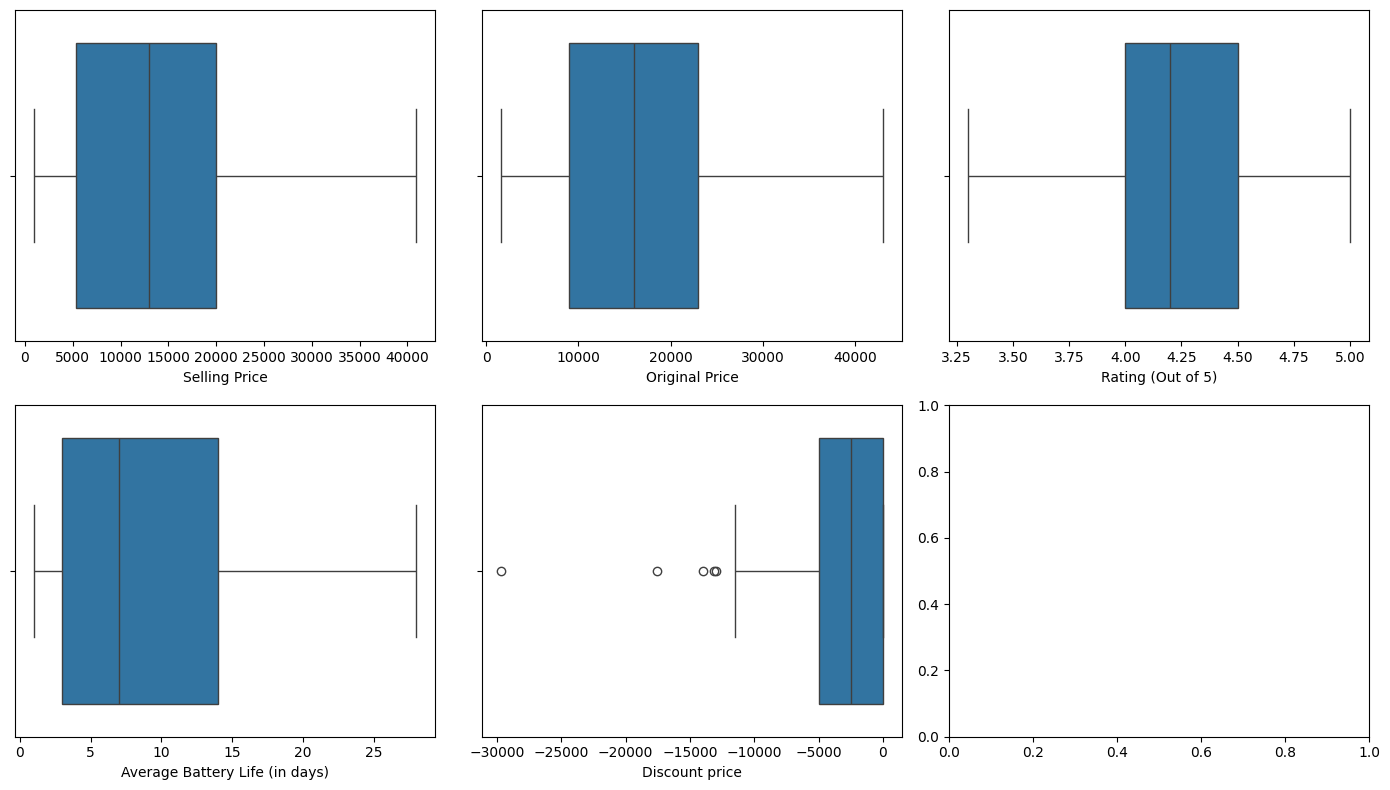

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()